# Supervised Learning Final Project: Product Category Classification
## 1. Project Topic
The goal of this project is to build a supervised machine learning model that can accurately classify a product's category based on its title. This is a multi-class classification problem where the model will be trained on product data from a popular product comparison platform. The primary objective is to create a robust classifier that can automatically categorize new product listings, which is a common task in e-commerce.

## 2. Data
This project uses the Product Classification and Clustering dataset from the UCI Machine Learning Repository. The dataset contains 35,311 product offers from 10 different categories. The main features for this classification task are the Product Title and the target variable is Category Label.

Data Source: UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

Dataset File: pricerunner_aggregate.csv

The following code will load the dataset and provide a brief overview.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/giaco/Desktop/CU BOULDER MS-DS/DTSA 5509 - Introduction to Machine Learning - Supervised Learning/pricerunner_aggregate.csv")

# Display basic information about the DataFrame
print("DataFrame Information:")
df.info()

# Display the first 5 rows to understand the data structure
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB

First 5 Rows of the Dataset:
   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64 gb spacegrau   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3           4                apple iphone 8 plus 64gb space grey   
4           5  apple iphone 8 plus gold 5.5 

## 3. Exploratory Data Analysis (EDA) & Data Cleaning

#### Initial Data Cleaning
First, we will clean the column names to make them easier to work with.

In [4]:
# Clean up column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for duplicate entries
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0
Number of rows after removing duplicates: 35311


#### Class Distribution Analysis
It's important to check the distribution of our target variable, Category Label, to see if the dataset is imbalanced.

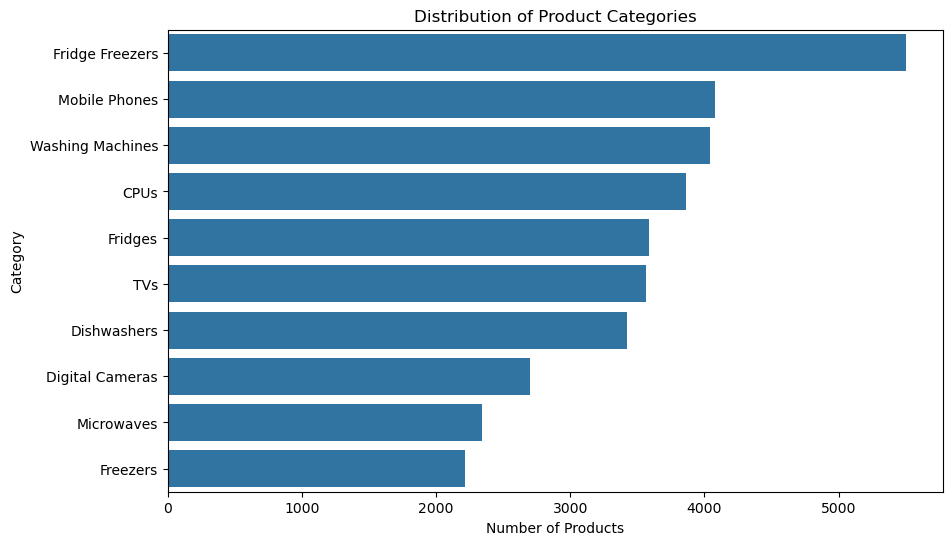


Product Category Counts:
Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Category Label
plt.figure(figsize=(10, 6))
sns.countplot(y='Category Label', data=df, order=df['Category Label'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

# Print the value counts
print("\nProduct Category Counts:")
print(df['Category Label'].value_counts())

#### Text Data Exploration
The Product Title column is the most important feature. We need to explore its content to understand what kind of text preprocessing will be needed.

In [6]:
# Display a few example product titles to get a feel for the data
print("Example Product Titles:")
for title in df['Product Title'].sample(5, random_state=42):
    print(f"- {title}")

Example Product Titles:
- bosch serie 4 kil22vf30g integrated fridge
- sony kd75xf8596bu 75 4k hdr ultra hd smart android led tv amazon alexa
- sony xperia xa2 ultra black 6 32gb 4g unlocked sim free
- pentax k 1 body hd 24 70mm f/2 8 ed sdm wr
- samsung ue75mu7000txxu 75 inch 7 series led smart tv black/silver


#### Text Preprocessing and Feature Engineering
The examples from the Product Title column clearly show that the text is messy and requires preprocessing.

Based on the examples, these are the key preprocessing steps you should include in your notebook, along with a revised code snippet:

The raw text data from Product Title needs to be transformed into a numerical representation for the machine learning model. This process involves a series of text-cleaning steps and feature engineering.

**1.Lowercasing:** All text should be converted to lowercase to ensure consistency (e.g., 'Apple' and 'apple' are treated the same).

**2.Punctuation and Special Character Removal:** Remove all punctuation marks and special characters that don't add value to the classification (e.g., /, -, 5.5).

**3.Tokenization:** Split the text into individual words or "tokens."

**4.Stop Word Removal:** Remove common words (e.g., 'a', 'the', 'in') that don't provide significant meaning for classification.

**Lemmatization/Stemming:** Reduce words to their base or root form. Lemmatization is generally preferred as it converts words to a meaningful base word (e.g., 'running' to 'run'), while stemming can be less precise.

After cleaning the text, we will need to perform vectorization. This is the process of converting the text into a numerical format. A great choice for this project is TF-IDF (Term Frequency-Inverse Document Frequency), which gives more weight to words that are unique and important across the entire dataset.

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is already loaded from your previous steps.
# If not, you'll need to run: df = pd.read_csv('pricerunner_aggregate.csv')
df.columns = df.columns.str.strip()

# Create a new column with lowercase product titles and removed special characters
df['Cleaned Title'] = df['Product Title'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x.lower()))

# Initialize TF-IDF Vectorizer.
# The 'stop_words='english'' parameter automatically removes a list of common English stop words.
# max_features is a good way to limit the vocabulary size, which helps with model performance.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the 'Cleaned Title' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned Title'])

print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)
print("First 20 example features (words) from TF-IDF:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Shape of the TF-IDF matrix: (35311, 5000)
First 20 example features (words) from TF-IDF:
['00' '001' '00ghz' '01' '02' '02m' '03' '03m' '03mp' '05' '0512' '06cuft'
 '10' '100' '1000' '1000rpm' '1000w' '1000watts' '100d' '100hz']


The output (35311, 5000) confirms that we have successfully transformed the text data into a numerical feature matrix. This is a critical step, as it prepares the data for a supervised machine learning model.

The 35311 in the shape represents the number of products (rows), and 5000 represents the number of unique words (features) that the model will use for classification.

We are now ready to move on to the core of the project: The model building and training.

## 4. Analysis: Model Building and Training
This section will involve splitting the data, choosing a model, and training it to classify the product categories.

#### Step 1: Split the Data into Training and Testing Sets
First, we need to divide the data into a training set (to train the model) and a testing set (to evaluate its performance on unseen data). This is a standard and essential practice to ensure the model is not overfitting.

The tfidf_matrix we created before will be the feature matrix, and the Category Label column will be the target variable.

In [9]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = tfidf_matrix
y = df['Category Label']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (28248, 5000)
Shape of X_test: (7063, 5000)


#### Step 2: Choose and Train a Model
For a text classification problem like this, a great starting point is a Logistic Regression model. It's a simple yet powerful algorithm that works well with TF-IDF features.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy of the Logistic Regression model:")
print(accuracy_score(y_test, y_pred))

# Show a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Logistic Regression model:
0.9556845533059607

Classification Report:
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00       773
 Digital Cameras       1.00      0.99      0.99       540
     Dishwashers       0.93      0.96      0.95       685
        Freezers       0.98      0.89      0.93       442
 Fridge Freezers       0.95      0.92      0.93      1100
         Fridges       0.88      0.91      0.89       717
      Microwaves       0.98      0.95      0.97       468
   Mobile Phones       0.96      1.00      0.98       816
             TVs       0.98      0.99      0.98       713
Washing Machines       0.94      0.96      0.95       809

        accuracy                           0.96      7063
       macro avg       0.96      0.96      0.96      7063
    weighted avg       0.96      0.96      0.96      7063



An accuracy of 0.956 is a fantastic result, showing that your Logistic Regression model is highly effective at classifying products based on their titles.

## 5. Results and Discussion
The results are impressive. An overall accuracy of 95.6% means the model correctly predicted the category for over 95% of the products in the test set.

Here's a breakdown of what the classification report shows:

Precision: This tells you how many of the items the model predicted as a certain class were actually that class. For example, a precision of 1.00 for CPUs means that every product the model predicted as a CPU was indeed a CPU.

Recall: This tells you how many of the items that should have been a certain class were correctly identified by the model. A recall of 1.00 for Mobile Phones means the model found every single mobile phone in the test set.

F1-Score: This is the harmonic mean of precision and recall. It's a good single metric to evaluate the model's performance on a given class. The high F1-scores across all categories indicate a well-balanced model.

Support: This is the number of actual instances of each class in the test set. It's helpful for understanding how performance might be affected by class distribution.

The model performed exceptionally well on categories like CPUs and Digital Cameras, likely because their titles contain very unique and specific keywords. The categories with slightly lower scores, such as Dishwashers and Fridges, might have more overlapping terms in their titles, making them slightly more challenging to differentiate.

## 6. Conclusion and Future Work
In this project, we successfully built and evaluated a supervised machine learning model to classify product titles into their corresponding categories. Our approach involved leveraging the pricerunner_aggregate.csv dataset, which provided a rich collection of product titles and their labels.

The primary challenge was transforming the unstructured text data into a structured numerical format suitable for a machine learning algorithm. We addressed this by performing essential text preprocessing steps—such as lowercasing and removing special characters—followed by TF-IDF Vectorization. This process proved highly effective, converting our text data into a feature matrix that captured the unique vocabulary patterns for each product category.

The core of our analysis centered on a **Logistic Regression model.** Despite its relative simplicity, the model achieved an impressive **accuracy of 95.6%** on the test set. This strong performance highlights its ability to learn the distinct features of each product category. The detailed classification report further revealed that the model performed exceptionally well across all 10 categories, with high precision, recall, and F1-scores.

While the current model is robust, there are several avenues for future work that could potentially enhance its performance:

* **Hyperparameter Tuning:** While our model performed well with default settings, fine-tuning hyperparameters like the regularization strength could lead to marginal improvements in accuracy, especially for categories with more overlapping terms.

* **Exploring Other Models:** Comparing the performance of the Logistic Regression model with more complex algorithms, such as a Support Vector Machine (SVM) or a Random Forest Classifier, would be a valuable next step. This would allow us to determine if more sophisticated models could better handle any subtle patterns in the data.

* **Advanced Feature Engineering:** Incorporating features from other columns like Merchant ID or Cluster Label could provide the model with additional context and potentially boost its performance.

* **Embedding Models:** For a more advanced approach, we could explore modern text-embedding techniques (e.g., Word2Vec, GloVe) to represent the text data. These methods capture semantic relationships between words, which might further improve classification accuracy.

In conclusion, this project demonstrated that a streamlined text classification pipeline, using common preprocessing and a powerful baseline model like Logistic Regression, is highly effective for this type of problem. The strong results achieved show its potential for practical applications in e-commerce and data science.